In [1]:
############################################
# Import packages
############################################

import pandas as pd
import csv
from parsel import Selector
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from datetime import date
from datetime import datetime, timedelta
import time
import re
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import math
from selenium.common.exceptions import NoSuchElementException


In [2]:
############################################
# Build list of all connected users
############################################

# Creates driver that is updated to work with the latest version of Chrome
driver = webdriver.Chrome(ChromeDriverManager().install())

# Navigate to Jack's page (user #1)
driver.get('https://steepster.com/jack/followers?page=1')

all_urls = []

current_user = 'jack'

user_dict = {current_user:{}}

follower_count = int(driver.find_element_by_id('follower_count').text)
max_follower_pg = int(math.ceil(follower_count / 10.0))

user_dict[current_user]['follower_count'] = follower_count
user_dict[current_user]['follower_pgs'] = max_follower_pg

following_count = int(driver.find_element_by_id('following_count').text)
# max_following_pg = int(round(following_count,-1)/10)
max_following_pg = int(math.ceil(following_count / 10.0))

user_dict[current_user]['following_count'] = following_count
user_dict[current_user]['following_pgs'] = max_following_pg

# user_id = driver.find_elements_by_css_selector("h1>a")

# for id_info in user_id:
#     user_id = id_info.get_attribute('data-leader-id')

follower_urls = []
# This list will be attached as the followers to the user
# It will als become the list from which we work to pull names to grow the network

ff_counts = []

for j in range(1,min(max_follower_pg+1,3)):
    print('now reading ', current_user, ' page ', j)
    if j == 1:
        pass
    else:
        driver.get(f'https://steepster.com/{current_user}/followers?page={j}')

    all_links = driver.find_elements_by_css_selector(".users>.user>.details>a")

    # For users who aren't in the user_dict yet, so I need to get their followers
    need_followers = []

    for link in all_links:
        user_link = link.get_attribute("href")
        m = re.search(r"(?<=\.com\/).*", user_link)
        follower_urls.append(m.group(0))

        print('current_follower: ', m.group(0))
        # print('Current user_dict list: ', user_dict.keys())

        if m.group(0) not in user_dict.keys():
            print('User is not in user_dict')
            if len(all_urls) > 0:
                all_urls.append(m.group(0))
            # Don't add to dictionary yet. I'll do that with the zipped lists later
            need_followers.append(m.group(0))
        else:
            print("This user is already in the user_dict")
    print('need_followers for ',current_user,': ',need_followers)
    
    follower_followers = driver.find_elements_by_css_selector(".users>.user>.details>em")

    for count in follower_followers:
        ff_count = int(count.get_attribute("data-pluralize-count"))
        ff_counts.append(ff_count)

    # zip the lists together
    zipped_ff_list = list(zip(follower_urls, ff_counts))

    print('Followers who are not in the user_dict and their follower count:\n', zipped_ff_list)

    for user, user_ff_count in zipped_ff_list:
        print('First user in zipped_ff_list: ', user)
        if user in need_followers:
            print('adding ',user,' to user_dict')
            user_dict[user] = {}
            user_dict[user]['follower_count'] = user_ff_count
            max_follower_pg = int(math.ceil(user_dict[user]['follower_count'] / 10.0))
            user_dict[user]['follower_pgs'] = max_follower_pg
        else:
            print(user,' is already in user_dict')
        # time.sleep(3)

# follower_urls is added to the current user's dict entry
user_dict[current_user]['followers'] = follower_urls

all_urls = follower_urls
# Now go to the next follower page

time.sleep(0.5)

# Close browser and terminate driver instance
driver.quit()





====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


now reading  jack  page  1
current_follower:  mike
User is not in user_dict
current_follower:  jason
User is not in user_dict
current_follower:  msg
User is not in user_dict
current_follower:  suli
User is not in user_dict
current_follower:  dschneids
User is not in user_dict
current_follower:  ispivey
User is not in user_dict
current_follower:  grace
User is not in user_dict
current_follower:  adamcl
User is not in user_dict
current_follower:  hering
User is not in user_dict
current_follower:  joeyroth
User is not in user_dict
need_followers for  jack :  ['mike', 'jason', 'msg', 'suli', 'dschneids', 'ispivey', 'grace', 'adamcl', 'hering', 'joeyroth']
Followers who are not in the user_dict and their follower count:
 [('mike', 204), ('jason', 617), ('msg', 35), ('suli', 7), ('dschneids', 18), ('ispivey', 12), ('grace', 6), ('adamcl', 7), ('hering', 7), ('joeyroth', 18)]
First user in zipped_ff_list:  mike
adding  mike  to user_dict
First user in zipped_ff_list:  jason
adding  jason  to 

In [ ]:
# to advance current user down the list of users,

i = 0

# for i in range(0,len(all_urls)+1):
while i <= 15: # len(all_urls)+1:
    current_user = all_urls[i]

    print('---------------------\ncurrent_user: ',current_user)
    print('---------------------\nall_urls index: ',i)

    driver = webdriver.Chrome(ChromeDriverManager().install())

    # Navigate to user's followers page
    driver.get(f'https://steepster.com/{current_user}/followers?page=1')

    # Set max follower and following pages
    max_follower_pg = user_dict[current_user]['follower_pgs']

    following_count = int(driver.find_element_by_id('following_count').text)
    # max_following_pg = int(round(following_count,-1)/10)
    max_following_pg = int(math.ceil(following_count / 10.0))
    
    follower_urls = []

    for j in range(1, min(max_follower_pg+1,4)):
        print('now reading ', current_user, ' page ', j)

        # Saves a reload of the first page for every user
        if j == 1:
            pass
        else:
            driver.get(f'https://steepster.com/{current_user}/followers?page={j}')

        # Retrieve URLs for followers
        all_links = driver.find_elements_by_css_selector(".users>.user>.details>a")
        
        # For users who aren't in the user_dict yet, so I need to get their followers
        need_followers = []
        page_follower_urls = []
        ff_counts = []

        # Parse usernames from href (e.g., 'jack' from 'steepster.com/jack')
        for link in all_links:
            user_link = link.get_attribute("href")
            m = re.search(r"(?<=\.com\/).*", user_link)
            follower_urls.append(m.group(0))
            page_follower_urls.append(m.group(0))
            # if url not in user_dict keys, append to all_urls

            print('current_follower: ', m.group(0))
            # print('Current user_dict list: ', user_dict.keys())
            

            if m.group(0) not in user_dict.keys():
                print('User is not in user_dict')
                if len(all_urls) > 0:
                    all_urls.append(m.group(0))
                # Don't add to dictionary yet. I'll do that with the zipped lists later
                need_followers.append(m.group(0))
            else:
                print("This user is already in the user_dict")
        print('need_followers for ',current_user,': ',need_followers)
        
        # if url not in all_urls, add to a list to get number of followers
        follower_followers = driver.find_elements_by_css_selector(".users>.user>.details>em")

        for count in follower_followers:
            ff_count = int(count.get_attribute("data-pluralize-count"))
            ff_counts.append(ff_count)
        
        # zip the lists together
        zipped_ff_list = list(zip(page_follower_urls, ff_counts))

        print('Followers who are not in the user_dict and their follower count:\n', zipped_ff_list)

        for user, user_ff_count in zipped_ff_list:
            print('User in zipped_ff_list: ', user)
            if user in need_followers:
                print('adding ',user,' to user_dict')
                user_dict[user] = {}
                user_dict[user]['follower_count'] = user_ff_count
                max_follower_pg = int(math.ceil(user_dict[user]['follower_count'] / 10.0))
                user_dict[user]['follower_pgs'] = max_follower_pg
            else:
                print(user,' is already in user_dict')
            # time.sleep(3)

    user_dict[current_user]['followers'] = follower_urls

    # Increment i to move to next user once browser closes
    i+=1

    print('---------------------\nall_urls: ',all_urls)

    # Close browser and terminate driver instance
    driver.quit()

    time.sleep(0.25)


In [58]:
# build edgelist from user_dict keys and follower lists
edges = []

for key in user_dict.keys():
    for subkey in user_dict[key].keys():
        if subkey == 'followers':
            for element in user_dict[key][subkey]:
                edges.append((element,key))

# refactor this into a gnarly list comprehension at some point

In [59]:
g = nx.DiGraph(edges)

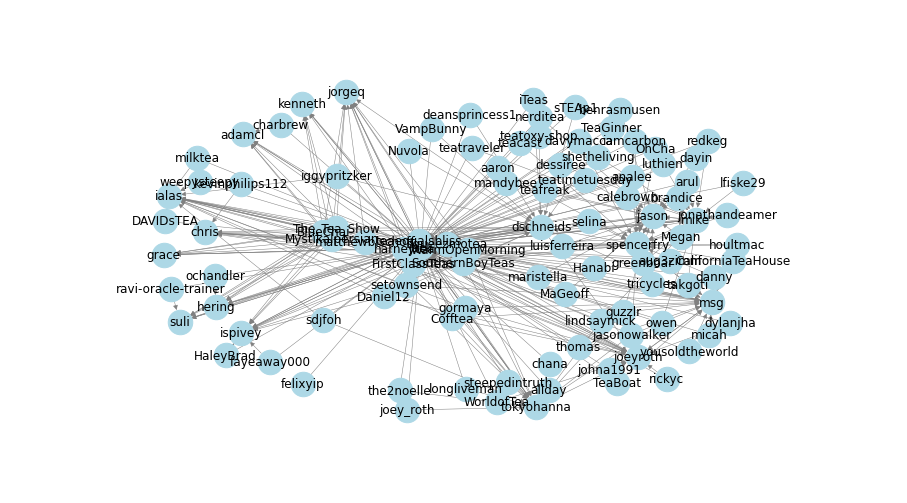

In [61]:
fig = plt.subplots(figsize=(16,9))
plt.margins(.2,.2)
nx.draw(g
        ,pos=nx.spring_layout(g)
        ,with_labels=True
        ,node_color='lightblue'
        ,node_size=600
        ,edge_color='gray'
        ,width=.5)
plt.show()

In [ ]:
# create pyvis Network object
net = Network(height = "600px", width = "800px", notebook = True)
net.from_nx(g)
net.show_buttons()
net.show('net1.html')
# Turn on the "To" arrows to see who follows who.

In [ ]:
########## Followers and Following ##########
# Number of followers
# get the value from the #id follower_count

# Number of pages needed to get all followers
# Round up follower_count to the nearest 10 and then divide by 10

# Number following
# get the value from the #id following_count

# Number of pages needed to get all following
# Round up following_count to the nearest 10 and then divide by 10


########## Get Follower Names ##########
# div class users, div class user - the id of that div is the unique user id
# If the unique user id is not in the dictionary of user ids,
#   then add the user id and the url and display names below

# div class users, div class user, div class details, a href is the url
# div class users, div class user, div class details, a content is the display name


#{
# 1:{followers:##,
#    following:##,
#    teas_rated:##,
#    url:'/jack'
#    display_name:'Jack'}
# 2:{followers:##,
#    following:##,
#    teas_rated:##,
#    url:'/mike'
#    display_name:'Mike'}
#}


# Navigate to follower page
# Make a list of all ids in the "user" class divs
# Remove follower user ids that are already in the dictionary
# Add remaining user ids to the dictionary as keys with url, display_name

# Navigate to next follower page and repeat

# What does it do when it gets to the end of the followers?
# Exit the loop
# Start on the following page


# Will need to chunk this out, like do 1,000 users at a time so I can save the dataset as I go
# Log the progress somewhere

# Should probably test it out on a small account, like my own.
# I can just follow 15 people and test it out.

# Write logic for someone who has zero followers or zero following (e.g., me)

In [163]:
# Just a quick for loop test to make sure it recalculated the length of murph every time
# Turns out, it is not. I need to find a way around that.
# Could try a while loop, like while i <= len(murph), keep going

murph = [1,2,3]

j = 4
i=0

for i in range(0,len(murph)):
# while i <= len(murph):
    print('i:',i,', len(murph):',len(murph))
    print(murph)
    murph.append(j)
    j+=1
    # print(j)
    i+=1
    # print('i=',i)
    # print('j=',j)
    if j >= 10:
        print('Stop. j=',j)
        break



i: 0 , len(murph): 3
[1, 2, 3]
i: 1 , len(murph): 4
[1, 2, 3, 4]
i: 2 , len(murph): 5
[1, 2, 3, 4, 5]


In [ ]:
# I can re-run the code to get followers from the all_urls list,
# and it will append new followers on to existing users! Awesome.
# To make this more efficient (although it still could be better),
# I could check the new max_follower_pg to see if it's different from what
# is in the user_dict entry for that person. If it's bigger, then I could
# just start the scraping function from there. It would be an update_user() function.

In [72]:
# scraping tea reviews should be much simpler because I'm just going to work
# from the list of teas, sorted by popularity. I don't have to build an "all_urls"
# sort of list to tell the code where to look next to find more tea.

##### get_tea_list #####
# Navigate to https://steepster.com/teas?sort=popular (sort by popularity to maximize early results)
#   Count the number of "product tea" class elements to loop through
#   count = len(driver.find_elements_by_class_name('your_class_name'))

# Tea Name: div ."products" > div ."product tea" > div ."tea" > a ."tea-name" text
# Brand: div ."products" > div ."product tea" > div ."tea" > a ."tea-name" > em
# Rating div ."products" > div ."product tea" > div ."tea" > div ."tea-rating awesome" text
# Link div ."products" > div ."product tea" > div ."tea" > a get href

# Note: There are 28 teas per page

# after scraping the list of teas, get reviews for each tea:

##### get_tea_reviews #####
#https://steepster.com/teas/davidstea/10338-forever-nuts?page=2#tasting-notes




In [58]:
tea_pages_to_scrape = 2

tea_dict = {}

for i in range(1,tea_pages_to_scrape+1):

    # Creates driver that is updated to work with the latest version of Chrome
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(f'https://steepster.com/teas?page={i}&sort=popular')

    tea_names = driver.find_elements_by_css_selector('.products>.product>.tea>.tea-name')

    names_to_zip = []

    for tea in tea_names:
        nb = tea.text.split('\n')
        name = nb[0]
        names_to_zip.append(name)
        tea_dict[name] = {}

        brand = nb[1]
        tea_dict[name]['brand'] = brand

        tea_link = tea.get_attribute("href")
        tea_dict[name]['url'] = tea_link

    tea_ratings = driver.find_elements_by_css_selector('.products>.product>.tea>.tea-rating')

    ratings_to_zip = []

    for tea in tea_ratings:
        rating = int(tea.text)
        ratings_to_zip.append(rating)

    zipped_ratings = list(zip(names_to_zip,ratings_to_zip))

    for element in zipped_ratings:
        tea_dict[element[0]]['rating'] = element[1]


    driver.quit()

    time.sleep(0.25)

# Need to write something that can pick up where ever this left off,
# like dividing the number of keys by 28 and then adding 1 to keep going



====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


In [59]:

for tea in tea_dict.keys():

    print('Current tea:',tea)

    tea_dict[tea]['reviewers'] = {}

    tea_url = tea_dict[tea]['url']

    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(f'{tea_url}?page=1#tasting-notes')
    time.sleep(1)

    max_pages = driver.find_elements_by_xpath("//nav[@class='pagination']//ul//li[last()-1]//a")
    for page in max_pages:
        max_review_pgs = int(page.text)
        tea_dict[tea]['review_pages'] = max_review_pgs


    for i in range(1, min(5,max_review_pgs)):

        # Only need this for >1 because we are already on the page
        if i > 1:
            driver.get(f'{tea_url}?page={i}#tasting-notes')

        all_user_elements = []

        user_div = driver.find_elements_by_xpath("//div[@class='user']")

        for user in user_div:

            user_info = []

            # Reviewer
            r = user.find_element_by_xpath(".//span[@itemprop='author']//a[@itemprop='url']")
            r_url = r.get_attribute('href')
            reviewer = re.search(r"(?<=\.com\/).*", r_url)
            user_info.append(reviewer.group(0))

            # Rating
            try:
                r = user.find_element_by_xpath(".//div[@itemprop='reviewRating']//span[@itemprop='ratingValue']")
                rating = int(r.text)
                user_info.append(rating)
            except NoSuchElementException:
                pass

            if len(user_info) == 2:
                all_user_elements.append(user_info)
                tea_dict[tea]['reviewers'][user_info[0]] = {}
                tea_dict[tea]['reviewers'][user_info[0]]['weight'] = user_info[1]

        
    driver.quit()
        
    time.sleep(0.5)

    print(tea,'complete')
    print('-----------------------\n')





====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Current tea: Forever Nuts




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Forever Nuts complete
-----------------------

Current tea: Pumpkin Chai




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Pumpkin Chai complete
-----------------------

Current tea: Read My Lips


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Read My Lips complete
-----------------------

Current tea: English Breakfast




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


English Breakfast complete
-----------------------

Current tea: Paris


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Paris complete
-----------------------

Current tea: Buttered Rum (Organic)




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Buttered Rum (Organic) complete
-----------------------

Current tea: Lady Grey




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Lady Grey complete
-----------------------

Current tea: Glitter & Gold




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Glitter & Gold complete
-----------------------

Current tea: Laoshan Black




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Laoshan Black complete
-----------------------

Current tea: Santa's Secret




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Santa's Secret complete
-----------------------

Current tea: Cream of Earl Grey (Organic)




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Cream of Earl Grey (Organic) complete
-----------------------

Current tea: Chocolate Rocket




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Chocolate Rocket complete
-----------------------

Current tea: Earl Grey (loose leaf)




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Earl Grey (loose leaf) complete
-----------------------

Current tea: Alpine Punch




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Alpine Punch complete
-----------------------

Current tea: Goji Pop




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Goji Pop complete
-----------------------

Current tea: Chocolate Chili Chai




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Chocolate Chili Chai complete
-----------------------

Current tea: Coco Chai Rooibos


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Coco Chai Rooibos complete
-----------------------

Current tea: Strawberry Rhubarb Parfait




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Strawberry Rhubarb Parfait complete
-----------------------

Current tea: Toasted Walnut


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Toasted Walnut complete
-----------------------

Current tea: Blueberry Jam Organic


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Blueberry Jam Organic complete
-----------------------

Current tea: Guangzhou Milk Oolong




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Guangzhou Milk Oolong complete
-----------------------

Current tea: Oh Canada!




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Oh Canada! complete
-----------------------

Current tea: Red Velvet Cake


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Red Velvet Cake complete
-----------------------

Current tea: Zen




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Zen complete
-----------------------

Current tea: Passion


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Passion complete
-----------------------

Current tea: Movie Night




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Movie Night complete
-----------------------

Current tea: Lime Gelato




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Lime Gelato complete
-----------------------

Current tea: Sleigh Ride


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Sleigh Ride complete
-----------------------

Current tea: Hot Cinnamon Spice




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Hot Cinnamon Spice complete
-----------------------

Current tea: Love Tea #7


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Love Tea #7 complete
-----------------------

Current tea: Organic The Skinny


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Organic The Skinny complete
-----------------------

Current tea: Buddha's Blend


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Buddha's Blend complete
-----------------------

Current tea: Vanilla Comoro




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Vanilla Comoro complete
-----------------------

Current tea: Salted Caramel




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Salted Caramel complete
-----------------------

Current tea: Birthday Cake




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Birthday Cake complete
-----------------------

Current tea: Midsummer Night's Dream


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Midsummer Night's Dream complete
-----------------------

Current tea: Long Life Oolong




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005
Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


Long Life Oolong complete
-----------------------

Current tea: Mother's Little Helper (Organic)




====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Mother's Little Helper (Organic) complete
-----------------------

Current tea: Chocolate Orange


Driver [C:\Users\ericd\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST driver version for 102.0.5005


Chocolate Orange complete
-----------------------

Current tea: Vanilla Orchid


ConnectionError: HTTPSConnectionPool(host='chromedriver.storage.googleapis.com', port=443): Max retries exceeded with url: /LATEST_RELEASE_102.0.5005 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000229076CB490>: Failed to establish a new connection: [WinError 10053] An established connection was aborted by the software in your host machine'))

In [61]:
edges = []

for tea in tea_dict.keys():
    for tea_char in tea_dict[tea].keys():
        if tea_char == 'reviewers':
            for reviewer in tea_dict[tea][tea_char].keys():
                edges.append((reviewer, tea, tea_dict[tea][tea_char][reviewer]))

In [62]:
edges

[('roswellstrange', 'Forever Nuts', {'weight': 79}),
 ('OMGsrsly', 'Forever Nuts', {'weight': 55}),
 ('cavo', 'Forever Nuts', {'weight': 82}),
 ('fjellrev', 'Forever Nuts', {'weight': 85}),
 ('Mercuryhime', 'Forever Nuts', {'weight': 85}),
 ('ashleyannie', 'Forever Nuts', {'weight': 100}),
 ('Kamyria', 'Forever Nuts', {'weight': 85}),
 ('CraftyVeganJenn', 'Forever Nuts', {'weight': 95}),
 ('canadianadia', 'Forever Nuts', {'weight': 78}),
 ('jennanlovell', 'Forever Nuts', {'weight': 85}),
 ('Rosehips', 'Forever Nuts', {'weight': 78}),
 ('jessiwrites', 'Forever Nuts', {'weight': 81}),
 ('lauriegilbert', 'Forever Nuts', {'weight': 96}),
 ('Doulton', 'Forever Nuts', {'weight': 59}),
 ('awkwardsoul', 'Forever Nuts', {'weight': 70}),
 ('kittenna', 'Forever Nuts', {'weight': 90}),
 ('teaequalsbliss', 'Forever Nuts', {'weight': 58}),
 ('mewakeling', 'Forever Nuts', {'weight': 100}),
 ('Yogru', 'Forever Nuts', {'weight': 79}),
 ('moraiwe', 'Forever Nuts', {'weight': 86}),
 ('erinn', 'Forever Nu

In [63]:
T = nx.DiGraph(edges)

In [64]:
source_nodes = set([edge[0] for edge in edges])
colors = ['C0' if i in source_nodes else 'C1' for i in T.nodes]

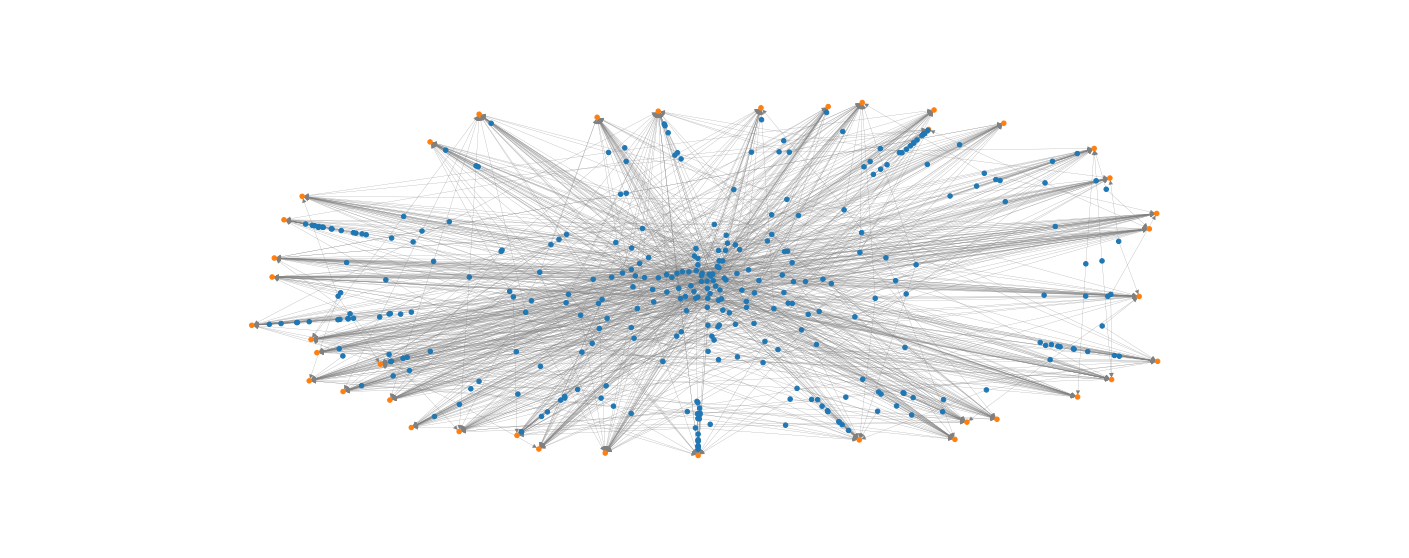

In [66]:
fig = plt.subplots(figsize=(25,10))
plt.margins(.2,.2)
nx.draw(T
        ,pos=nx.spring_layout(T)
        ,with_labels=False
        ,node_color=colors
        ,node_size=20
        ,edge_color='gray'
        ,width=0.2)
plt.show()

In [42]:
T['Aedon2']

AtlasView({'Pumpkin Chai': {'weight': 100}, 'Read My Lips': {'weight': 100}, 'Strawberry Rhubarb Parfait': {'weight': 66}, 'Oh Canada!': {'weight': 100}})

In [55]:
edge_weights = []

for i in list(T.edges(data=True)):
    for key in i[2]:
        edge_weights.append(i[2][key]/100)

In [60]:
tea_dict

{'Forever Nuts': {'brand': 'DAVIDsTEA',
  'url': 'https://steepster.com/teas/davidstea/10338-forever-nuts',
  'rating': 80,
  'reviewers': {'roswellstrange': {'weight': 79},
   'OMGsrsly': {'weight': 55},
   'cavo': {'weight': 82},
   'fjellrev': {'weight': 85},
   'Mercuryhime': {'weight': 85},
   'ashleyannie': {'weight': 100},
   'Kamyria': {'weight': 85},
   'CraftyVeganJenn': {'weight': 95},
   'canadianadia': {'weight': 78},
   'jennanlovell': {'weight': 85},
   'Rosehips': {'weight': 78},
   'jessiwrites': {'weight': 81},
   'lauriegilbert': {'weight': 96},
   'Doulton': {'weight': 59},
   'awkwardsoul': {'weight': 70},
   'kittenna': {'weight': 90},
   'teaequalsbliss': {'weight': 58},
   'mewakeling': {'weight': 100},
   'Yogru': {'weight': 79},
   'moraiwe': {'weight': 86},
   'erinn': {'weight': 92},
   'JonTea': {'weight': 71},
   'DaisyChubb': {'weight': 93},
   'Lilysmom': {'weight': 82},
   'CHAroma': {'weight': 81},
   'Littleelle': {'weight': 69},
   'Fiddling': {'weig

In [45]:
T.edges(data=True)

OutEdgeDataView([('roswellstrange', 'Forever Nuts', {'weight': 79}), ('roswellstrange', 'Pumpkin Chai', {'weight': 60}), ('roswellstrange', 'Paris', {'weight': 68}), ('roswellstrange', 'Buttered Rum (Organic)', {'weight': 83}), ('roswellstrange', 'Cream of Earl Grey (Organic)', {'weight': 82}), ('roswellstrange', 'Chocolate Rocket', {'weight': 84}), ('roswellstrange', 'Goji Pop', {'weight': 70}), ('roswellstrange', 'Blueberry Jam Organic', {'weight': 98}), ('roswellstrange', 'Guangzhou Milk Oolong', {'weight': 60}), ('roswellstrange', 'Oh Canada!', {'weight': 79}), ('roswellstrange', 'Movie Night', {'weight': 86}), ('roswellstrange', 'Lime Gelato', {'weight': 44}), ('roswellstrange', 'Sleigh Ride', {'weight': 48}), ('OMGsrsly', 'Forever Nuts', {'weight': 55}), ('cavo', 'Forever Nuts', {'weight': 82}), ('cavo', 'Pumpkin Chai', {'weight': 78}), ('cavo', 'Read My Lips', {'weight': 79}), ('cavo', 'Paris', {'weight': 86}), ('cavo', 'Laoshan Black', {'weight': 94}), ('cavo', "Santa's Secret"